In [21]:
import { launch, ElementHandle } from "../src/deps.ts"

await using browser = await launch({ headless: false })

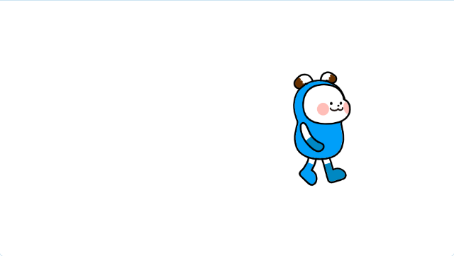

In [36]:
{
    await using page = await browser.newPage("https://playentry.org/ws/new")

    await page.waitForSelector(".tooltipGuide")
    await page.$(".tooltipGuide")
        .then(x => x?.evaluate(
            (el: HTMLElement) => el.remove()
        ))

    await page.waitForSelector("canvas")

    const Entry = {} as any

    const proj = JSON.parse(await Deno.readTextFile("../example/1.json"))

    await page.evaluate(proj => {
        Entry.clearProject()
        Entry.loadProject(proj)
        Entry.engine.run()
    }, { args: [proj] })

    await page.$("canvas")
        .then(x => x?.screenshot()!)
}